<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-2-Kaggle-Challenge/blob/master/module4-classification-metrics/skhabiri_LS_DS_224_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 4*

---

# Classification Metrics

## Assignment
- [ ] If you haven't yet, [review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Plot a confusion matrix for your Tanzania Waterpumps model.
- [ ] Continue to participate in our Kaggle challenge. Every student should have made at least one submission that scores at least 70% accuracy (well above the majority class baseline).
- [ ] Submit your final predictions to our Kaggle competition. Optionally, go to **My Submissions**, and _"you may select up to 1 submission to be used to count towards your final leaderboard score."_
- [ ] Commit your notebook to your fork of the GitHub repo.
- [ ] Read [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](http://archive.is/DelgE), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.


## Stretch Goals

### Reading

- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)


### Doing
- [ ] Share visualizations in our Slack channel!
- [ ] RandomizedSearchCV / GridSearchCV, for model selection. (See module 3 assignment notebook)
- [ ] Stacking Ensemble. (See module 3 assignment notebook)
- [ ] More Categorical Encoding. (See module 2 assignment notebook)

# Cross-Validation


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


**You can't just copy** from the lesson notebook to this assignment.

- Because the lesson was **regression**, but the assignment is **classification.**
- Because the lesson used [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html), which doesn't work as-is for _multi-class_ classification.

So you will have to adapt the example, which is good real-world practice.

1. Use a model for classification, such as [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. Use hyperparameters that match the classifier, such as `randomforestclassifier__ ...`
3. Use a metric for classification, such as [`scoring='accuracy'`](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)
4. If you’re doing a multi-class classification problem — such as whether a waterpump is functional, functional needs repair, or nonfunctional — then use a categorical encoding that works for multi-class classification, such as [OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html) (not [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html))



## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- Add your own stretch goals!
- Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/). See the previous assignment notebook for details.
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


In [138]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [139]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import category_encoders as ce
# from category_encoders import OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

from sklearn.pipeline import make_pipeline, Pipeline


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, mean_absolute_error




In [140]:
# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [141]:
# Tuning parameters
# In category reduction of each categorical feature {#"others"+offset < sum(#"kept_values")}
other_offset = -1000

# only categorical features with maximum num_card value of cardinality are kept
cardinal_order = 10000

# decision tree depth
# num_depth =16

In [142]:
def wrangle(X):
    
    def zero_to_nan(df, col_list):
        zero_list = [0, "0", -2e-08]
        for col in col_list:
          # this is faster than .replace method
            df.loc[df[col].isin(zero_list), col] = np.nan
        return df   
    
    X["date_recorded"] = pd.to_datetime(X["date_recorded"], infer_datetime_format=True)
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')

    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']   

    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)

    # Drop duplicate columns
    duplicate_columns = ['quantity_group']
    X = X.drop(columns=duplicate_columns)

    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these like null values
    # X['latitude'] = X['latitude'].replace(-2e-08, np.nan)
    
    # When columns have zeros and shouldn't, they are like null values
    cols_with_zeros = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population']
    # .replace is a slow method
    # for col in cols_with_zeros:
    #     X[col] = X[col].replace(0, np.nan)

    
    # drop_cols = ["num_private", "waterpoint_type_group", "source_type",
    #             , "quality_group", "payment_type", "management_group", 
    #             "extraction_type_group"]
    
    # X = X.drop(drop_cols, axis=1)



    X = zero_to_nan(X, cols_with_zeros)
    return X

In [143]:
# The status_group column is the target
target = 'status_group'

# Arrange data into X features matrix and y target vector 
X_train = train.drop(columns=[target])
y_train = train[target]

X_test = test[X_train.columns]

assert X_train.columns.equals(X_test.columns)
X_train.shape, X_test.shape

((59400, 40), (14358, 40))

In [144]:
X_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [145]:
# Split train into train & val

# train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
#                               stratify=train['status_group'], random_state=42)

# train.shape, val.shape, test.shape

In [146]:
X_train = wrangle(X_train)
X_test = wrangle(X_test)

X_train.shape, X_test.shape

((59400, 40), (14358, 40))

In [147]:
X_train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'year_recorded', 'month_recorded',
       'day_recorded', 'years'],
      dtype='object')

In [148]:
# reduces number of the categories
def cat_comb(train, testval_list, col_list, other_offset):
  '''
  ex/ cat_comb(train, [validation, test] [col1, col2], 100)
  '''
  df = train.copy()
  test_list = testval_list.copy()
  for col_name in col_list:
    cat_ser = df[col_name].value_counts(sort=True, ascending=False, dropna=False)
    # make sure other category is less than sum of predecessors
    for i in range(len(cat_ser)):
      if cat_ser[:i+1].sum() < (cat_ser[i+1:].sum() + other_offset):
        continue
      else:
        n_cat = i+2
        break
  
    cat_keep = list(cat_ser[:n_cat-1].index)
    df.loc[~df[col_name].isin(cat_keep), col_name] = "other"
    
    # alternative, very slow .replace method
    # mask = ~df[col_name].isin(cat_keep)
    # df[col_name] = df[col_name].replace(mask, "other")


    for df_i in test_list:
      df_i.loc[~df_i[col_name].isin(cat_keep), col_name] = "other"
  
    # alternative way, but could get a size issue with test or validation data
    # cat_bool = ~(df[col_name].isin(cat_ser.index[:n_cat-1]))
    # df.loc[cat_bool, col_name] = "other"
  return df, test_list

In [149]:
# reduce number of categories in categorical columns, such
# the total count of remaining feature is count of "other"+offset 
# this would prevent "other" category becomes the most frequent category in a column

cat_features = X_train.select_dtypes(exclude='number').columns.to_list()
numeric_features = X_train.select_dtypes(include='number').columns.to_list()

assert len(numeric_features) + len(cat_features) == len(X_train.columns)


# X_train, X_test_list = cat_comb(X_train, [X_test], cat_features, offset)
# X_test = X_test_list[0]

X_train.shape, X_test.shape

((59400, 40), (14358, 40))

In [150]:
def low_cardinal(train_df, cardinal_order):
  # Get a list of the numeric features
  numeric_features = train_df.select_dtypes(include='number').columns.to_list()

  nonnum_features = train_df.columns[~train_df.columns.isin(numeric_features)].to_list()
  # nonnum_features = train_df.select_dtypes(exclude='number').columns

  # Get a series with the cardinality of the nonnumeric features
  cardinality = train_df.select_dtypes(exclude='number').nunique()
  print(cardinality.sort_values())

  # Get a list of all categorical features with cardinality <= num_cat
  lowcardinal_features = cardinality[cardinality <= cardinal_order].index.to_list()
  # Combine the lists 
  features = numeric_features + lowcardinal_features
  hicardinal_feat = train_df.columns[~train_df.columns.isin(features)]
  return features, hicardinal_feat

In [151]:
# features, hicardinal_feat = low_cardinal(X_train, cardinal_order)

# X_train = X_train[features]
# X_test = X_test[features]
print(f'\nhigh cardinal features that has been dropped:\n{hicardinal_feat}')



high cardinal features that has been dropped:
Index([], dtype='object')


In [152]:
X_train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'year_recorded', 'month_recorded',
       'day_recorded', 'years'],
      dtype='object')

In [153]:
X_train.shape, X_test.shape

((59400, 40), (14358, 40))

### Cross Validation and hyper parameter tuning

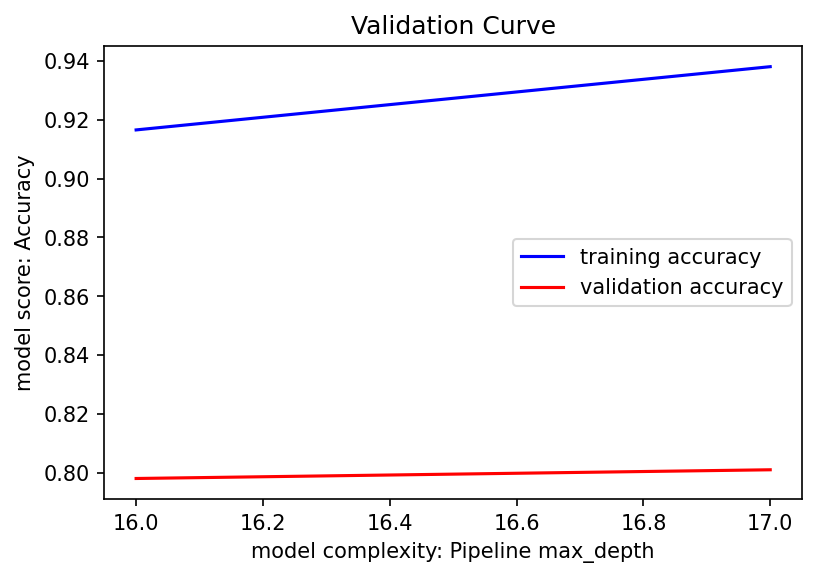

In [154]:
# Characterize hyper parameters on a decision tree or ensemble tree

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    # SelectKBest(f_classif), 
    # DecisionTreeClassifier(max_depth=13, min_samples_split=2)
    RandomForestClassifier(random_state=42, min_samples_split=2, n_estimators=200)

)
par_name = "max_depth"
# par_range = [2**i for i in range(0,11,1)]
par_range = range(16,18,1)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    # param_name='decisiontreeclassifier__'+ par_name, 
    # param_name='selectkbest__'+ par_name, 
    param_name='randomforestclassifier__'+ par_name, 

    param_range=par_range, scoring='accuracy', 
    cv=2,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(par_range, np.mean(train_scores, axis=1), color='blue', label='training accuracy')
plt.plot(par_range, np.mean(val_scores, axis=1), color='red', label='validation accuracy')
plt.title('Validation Curve')
plt.xlabel(f'model complexity: Pipeline {par_name}')
plt.ylabel('model score: Accuracy')
plt.legend();

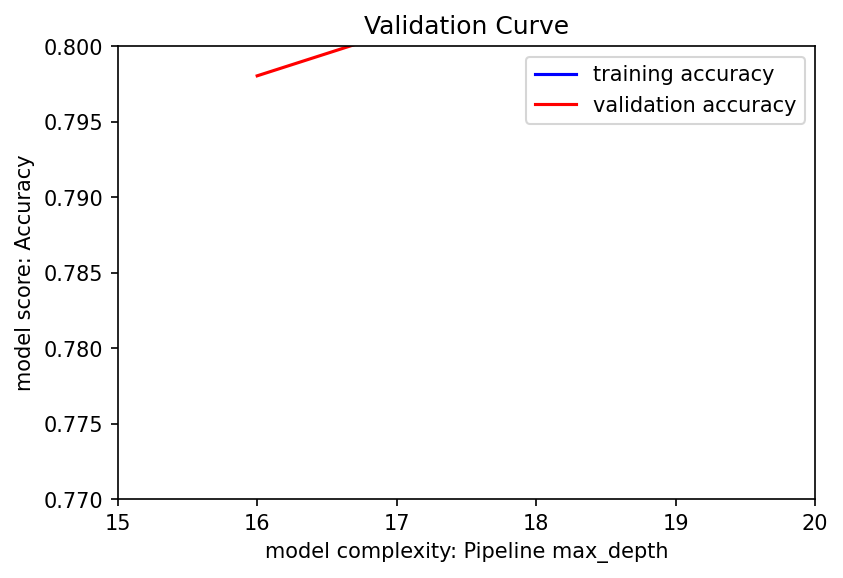

In [155]:
plt.figure(dpi=150)
plt.plot(par_range, np.mean(train_scores, axis=1), color='blue', label='training accuracy')
plt.plot(par_range, np.mean(val_scores, axis=1), color='red', label='validation accuracy')
plt.title('Validation Curve')
plt.xlabel(f'model complexity: Pipeline {par_name}')
plt.ylabel('model score: Accuracy')
plt.ylim((.77, .8))  # Zoom in
plt.xlim((15, 20))  # Zoom in

plt.legend();

In [156]:
# from scipy.stats import randint, uniform
import random 
a = [random.randint(50, 100) for i in range(10)]
a

[63, 90, 69, 73, 51, 73, 57, 88, 83, 95]

In [ ]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    # SelectKBest(f_classif), 
    RandomForestClassifier(random_state=42, min_samples_split=2, n_estimators=100, oob_score=True)
)

print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestclassifier'])

x_n_iter = 50

param_distributions = {
    # 'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__min_samples_leaf': [random.randint(1, 100) for i in range(8)], 
    'randomforestclassifier__max_depth': [random.randint(7, 58) for i in range(x_n_iter)], 
}

# If you're on Colab, decrease x_n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=x_n_iter, 
    cv=10, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train)
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', search.best_score_)


Model Hyperparameters:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)
Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 23

In [166]:
pipeline = search.best_estimator_
pipeline

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['funder', 'installer', 'wpt_name',
                                      'basin', 'subvillage', 'region', 'lga',
                                      'ward', 'public_meeting',
                                      'scheme_management', 'scheme_name',
                                      'permit', 'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=55, max_features='auto',
                                 

In [167]:
print('Cross-validation oob Accuracy', pipeline.named_steps['randomforestclassifier'].oob_score_)


Cross-validation oob Accuracy 0.7988383838383838


In [168]:
y_pred = pipeline.predict(X_test)
y_pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [169]:
#alternatively

pred1 = search.predict(X_test)
pred1

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [170]:
print(sum(pred1 != y_pred))
(pred1 == y_pred).all()

0


True

In [172]:
submission_0 = sample_submission.copy()
submission_0["status_group"] = y_pred
submission_0.nunique()

id              14358
status_group        3
dtype: int64

In [173]:
submission_0.to_csv("submission_9.csv", index=False)

In [ ]:
# Filenames of your submissions you want to ensemble
files = ['submission_7.csv', 'submission_8.csv', 'submission_9.csv']
 
target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]
 
# sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('Usubmission.csv', index=False)

In [ ]:
submission

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14353,39307,non functional
14354,18990,functional
14355,28749,functional
14356,33492,non functional


In [157]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=42)

# # Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]


# # Make pipeline!
# pipeline = make_pipeline(
#     # FunctionTransformer(wrangle, validate=False), 
#     ce.OrdinalEncoder(), 
#     SimpleImputer(strategy='mean'), 
#     RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
# )

# # Fit on train, score on val
# pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

plt.rcParams['figure.dpi'] = 100
plot_confusion_matrix(pipeline, X_val, y_val, values_format='.0f', xticks_rotation='vertical')

In [ ]:
C = pd.DataFrame(confusion_matrix(y_val, y_pred))
C

In [ ]:
correct_pred_sum = sum([C.iloc[i,i] for i in range(len(C))])
total_pred = C.sum()
correct_pred_sum, total_pred

In [ ]:
accuracy_calc = correct_pred_sum / total_pred
accuracy_calc
assert accuracy_calc == accuracy_score(y_val, y_pred)

In [ ]:
truth_sum = C.sum(axis=1)
predict_sum = C.sum(axis=0)

pred_t = pd.Series([C.iloc[i,i] for i in range(len(C))])

truth_sum, predict_sum, pred_t

In [ ]:
recal = pred_t / truth_sum
precision = pred_t / predict_sum
accuracy = pred_t.sum() / truth_sum.sum()

In [ ]:
print(classification_report(y_val, y_pred))